<p style="font-family: Arial; font-size:2.2em;color:purple; font-style:bold"><br>
An analysis on the trending genre of movies over a period of 20 years</p><br>

**MiniProject:**

This mini project aims at identifying the trend of movie genres betwreen the period of year 1995 to 2019

**Dataset Used:**
 https://grouplens.org/datasets/movielens/
 
**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data from data sources movies.csv and ratings.csv 

In [3]:
data_movies = pd.read_csv("../Datasets/movielens/movies.csv", sep=',')
data_rating = pd.read_csv("../Datasets/movielens/ratings.csv", sep=',')

List columns from the data frames. Keep only the relevent columns

In [4]:
print(data_movies.columns)
print(data_rating.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['movieId', 'rating', 'timestamp'], dtype='object')


In order to plot a graph between diffrent genres over the years, we need mean of ratings per genre plotted against timestamp.
The column movieId is common between the two data frames, hence can be used as an anchor to joing the two data frames. Let's first clean up the data frames before joining.

In [5]:
#data_movies['year'] = data_movies['title'].str.extract('.*\\((.*)\\).*', expand=True)
data_rating['year'] = pd.to_datetime(data_rating['timestamp'], unit='s').dt.year

In [6]:
print(data_movies.columns)
print(data_rating.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['movieId', 'rating', 'timestamp', 'year'], dtype='object')


In [7]:
del data_rating['timestamp']
print(data_rating.columns)

Index(['movieId', 'rating', 'year'], dtype='object')


In [8]:
del data_movies['title']
print(data_movies.columns)

Index(['movieId', 'genres'], dtype='object')


Our two dataframes are ready with only the relevent information. Lets clean them for any null values.

In [9]:
data_rating = data_rating.dropna()
data_rating.isnull().any()

movieId    False
rating     False
year       False
dtype: bool

In [10]:
data_movies = data_movies.dropna()
data_movies.isnull().any()

movieId    False
genres     False
dtype: bool

Our data frames now have only the relevent data. Time to merge them and see what shape and columns they hold.

In [11]:
merged_data = pd.merge(data_movies,data_rating, on = 'movieId', how='inner')

In [12]:
print(merged_data.shape)
merged_data.head()

(1048575, 4)


,movieId,genres,rating,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006
1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015
2,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,2019
3,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,1997
4,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,1998


In [13]:
merged_data.isnull().any()

movieId    False
genres     False
rating     False
year       False
dtype: bool

In [14]:
print(merged_data.columns)
merged_data.head()

Index(['movieId', 'genres', 'rating', 'year'], dtype='object')


,movieId,genres,rating,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006
1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015
2,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,2019
3,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,1997
4,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,1998


In [15]:
max_year = merged_data['year'].max()
min_year = merged_data['year'].min()
print(max_year)
print(min_year)

2019
1995


Now, since we need to list all genres, this can be achieved by identifying the longest string in the 'genres' column. Lets split the genres column to list all genres indivuidually.

In [16]:
expanded_genre = merged_data['genres'].str.split('|', expand =True)

In [17]:
expanded_genre.shape

(1048575, 10)

Since, not all rows from the expanded genres dataframe have the max string, hence multiple rows might have null values. Lets extract the row with no null values. I.e. a record with all genres.

In [18]:
NonNullColumns = expanded_genre.dropna()

In [19]:
NonNullColumns.head(1)

,0,1,2,3,4,5,6,7,8,9
940222,Action,Adventure,Comedy,Crime,Drama,Film-Noir,Horror,Mystery,Thriller,Western


Since movieId 940222 has 10 genres, hence max number of genres we have is 10 and are listed above.

In [20]:
expanded_genre = 0
merged_data.columns

Index(['movieId', 'genres', 'rating', 'year'], dtype='object')

In [21]:
merged_data[merged_data['genres'].str.contains('Action')]

,movieId,genres,rating,year
4616,6,Action|Crime|Thriller,3.0,1998
4617,6,Action|Crime|Thriller,4.0,1999
4618,6,Action|Crime|Thriller,4.0,1999
4619,6,Action|Crime|Thriller,5.0,1996
4620,6,Action|Crime|Thriller,4.0,2001
...,...,...,...,...
1048549,207023,Action|Crime|Mystery|Thriller,2.5,2019
1048564,207642,Action|Drama|Romance,5.0,2019
1048565,207830,Action|Sci-Fi,4.0,2019
1048566,207830,Action|Sci-Fi,3.0,2019


Now that we have all genres available, lets sort out merged dataframe with filters of the available genres.
Available genres in the dataset are:

**Action  |  Adventure  |  Comedy  |  Crime  |  Drama  |  Film-Noir  |  Horror  |  Mystery  |  Thriller  |  Western	*


In [22]:
def annual_mean_rating(col):
    result_array = []
    for i in col:   
        result_array.append((merged_data[merged_data['year'] == i].rating.mean()))
    return result_array

In [23]:
#creating fileter for genre  'Action'
Action_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Action')].unique())
Action_rating = np.asarray(annual_mean_rating(Action_years))

In [24]:
#creating fileter for genre  'Adventure'
Adventure_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Adventure')].unique())
Adventure_rating = np.asarray(annual_mean_rating(Adventure_years))

In [25]:
#creating fileter for genre  'Comedy'
Comedy_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Comedy')].unique())
Comedy_rating = np.asarray(annual_mean_rating(Comedy_years))

In [26]:
#creating fileter for genre  'Crime'
Crime_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Crime')].unique())
Crime_rating = np.asarray(annual_mean_rating(Crime_years))

In [27]:
#creating fileter for genre  'Drama'
Drama_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Drama')].unique())
Drama_rating = np.asarray(annual_mean_rating(Drama_years))

In [28]:
#creating fileter for genre  'Film-Noir'
Film_Noir_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Film-Noir')].unique())
Film_Noir_rating = np.asarray(annual_mean_rating(Film_Noir_years))

In [29]:
#creating fileter for genre  'Horror'
Horror_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Horror')].unique())
Horror_rating = np.asarray(annual_mean_rating(Horror_years))

In [30]:
#creating fileter for genre  'Mystery'
Mystery_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Mystery')].unique())
Mystery_rating = np.asarray(annual_mean_rating(Mystery_years))

In [31]:
#creating fileter for genre 'Thriller'
Thriller_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Thriller')].unique())
Thriller_rating = np.asarray(annual_mean_rating(Thriller_years))

In [32]:
#creating fileter for genre  'Western'
Western_years = np.asarray(merged_data.year[merged_data['genres'].str.contains('Western')].unique())
Western_rating = np.asarray(annual_mean_rating(Western_years))

Now that we have our final dataframe and all genres available, Lets plot them to see how they standout to eachother witing the max and min years of the dataset.

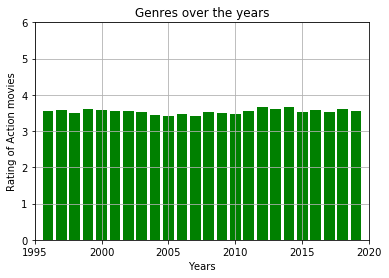

In [33]:
plt.bar(Action_years, Action_rating, color ='g') 
plt.xlabel('Years')
plt.ylabel('Rating of Action movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

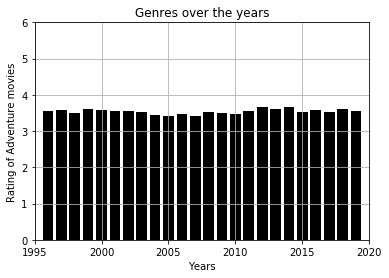

In [34]:
plt.bar(Adventure_years, Adventure_rating, color ='k') 
plt.xlabel('Years')
plt.ylabel('Rating of Adventure movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

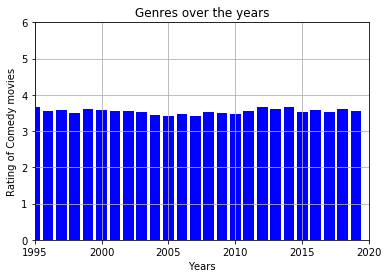

In [35]:
plt.bar(Comedy_years, Comedy_rating, color ='b')
plt.xlabel('Years')
plt.ylabel('Rating of Comedy movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

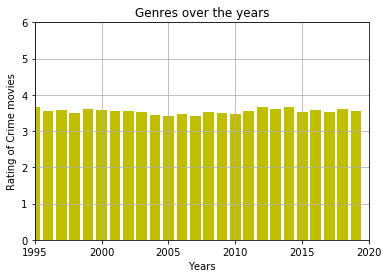

In [36]:
plt.bar(Crime_years, Crime_rating, color ='y')
plt.xlabel('Years')
plt.ylabel('Rating of Crime movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

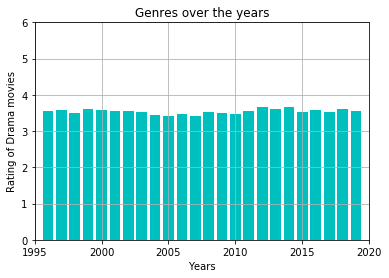

In [37]:
plt.bar(Drama_years, Drama_rating, color ='c')
plt.xlabel('Years')
plt.ylabel('Rating of Drama movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

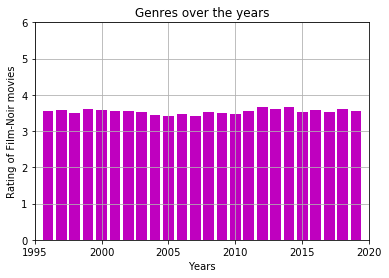

In [38]:
plt.bar(Film_Noir_years, Film_Noir_rating, color ='m')
plt.xlabel('Years')
plt.ylabel('Rating of Film-Noir movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

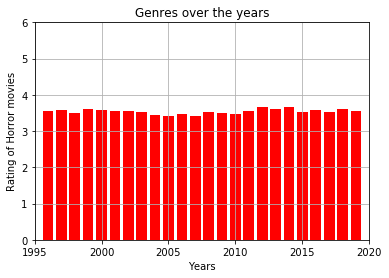

In [39]:
plt.bar(Horror_years, Horror_rating, color ='r')
plt.xlabel('Years')
plt.ylabel('Rating of Horror movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

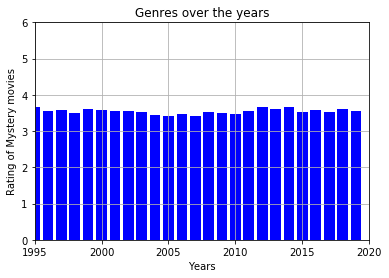

In [40]:
plt.bar(Mystery_years, Mystery_rating, color ='b')
plt.xlabel('Years')
plt.ylabel('Rating of Mystery movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

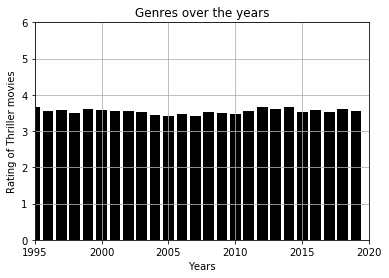

In [41]:
plt.bar(Thriller_years, Thriller_rating, color ='k')
plt.xlabel('Years')
plt.ylabel('Rating of Thriller movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

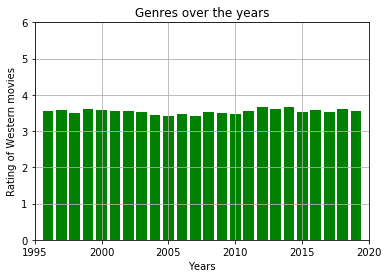

In [42]:
plt.bar(Western_years, Western_rating, color ='g')
plt.xlabel('Years')
plt.ylabel('Rating of Western movies')
plt.title('Genres over the years')
# to make more honest, start they y axis at 0
plt.axis([1995, 2020,0,6])
plt.grid(True)
plt.show()

In [43]:
#performance = [Action_rating,Adventure_rating,Comedy_rating,Crime_rating,Drama_rating,Film_Noir_rating,Horror_rating,Mystery_rating,Thriller_rating,Western_rating]
# the histogram of the data
#plt.hist(performance, 10, density=True, facecolor='m')

#plt.xlabel('Year')
#plt.ylabel('Average rating')
#plt.title('Average Rating of Genres over the years')
#plt.axis([1995, 2020,0,6])
#plt.grid(True)
#print(performance)
#plt.show()

As we can see that the general trend for all the given genres for the period of time between 1995 and 2020 were almost same, hence we can conclude that no specific type of genre gained popularity.